

# 项目：TMDb电影数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database），包括用户评分和票房。“演职人员 (cast)”、“电影类别 (genres)”等数据列包含由竖线字符（|）分隔的多个数值。“演职人员 (cast) ”列中有一些奇怪的字符。

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

加载`./tmdb-movies.csv`文件并进行数据整理

* 数据集中的样本数
* 数据集中的列数
* 数据集中每列的数据类型
* 数据集中每列有无缺失值的数据
* 数据集有无重复行

### 常规属性

加载数据，并浏览部分数据：

In [53]:
df = pd.read_csv('./tmdb-movies.csv');
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


查看数据集各列信息：

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

检查每列是否有缺失值并显示缺失数量：

In [55]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

检查是否用重复行：

In [56]:
df.duplicated().sum()

1

> **提示**：_不应_在每个 notebook 框 (cell) 中进行太多操作。可以自由创建框，来进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索性操作。不要求对其进行组织，但请务必仔细阅读备注，理解每个代码框的用途。完成分析之后，你可以创建 notebook 副本，在其中去除多余数据，组织好你的每一步分析，从而形成信息连贯、结构紧密的报告。

> **提示**：请务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。你需要尽量做到这一点，以便读者更好地理解后续框中的内容。

### 缺失数据处理

将imdb_id为空的数据去除：

In [57]:
df.dropna(subset=['imdb_id'], inplace=True)
df['imdb_id'].isnull().sum()

0

将genres为空的数据使用空字符串填充

In [58]:
df['genres'].fillna('', inplace=True)
df['genres'].isnull().sum()

0

### 数据去重处理

In [59]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<a id='eda'></a>
## 探索性数据分析


### 每年最受欢迎的电影类别是哪些?

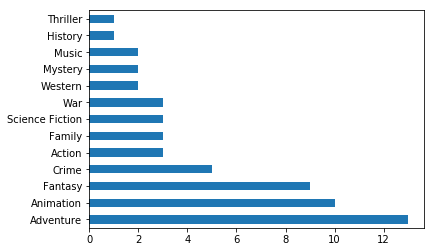

In [112]:
# 获取电影类型
df1 = df[['popularity','genres','release_year']]
df1 = df1[df1['genres'] != '']
df1['genres'] = df1['genres'].str.split('|')
# 为每一个分类增加一行数据
genres = np.concatenate(df1['genres'].values)
popularity = df1['popularity'].repeat(df1['genres'].apply(len))
release_year = df1['release_year'].repeat(df1['genres'].apply(len))
new_df=pd.DataFrame({'genres':genres, 'popularity':popularity, 'release_year':release_year})
# 按release_year & genres 分组并计算popularity的平均值
pop_mean_df = new_df.groupby(['release_year','genres']).agg({'popularity':np.mean}).reset_index()
# 按release_year分组计算最大popularity并添加到dataframe中
pop_mean_df['max_popularity'] = pop_mean_df.groupby(['release_year'])['popularity'].transform(np.max)
# 获取每年最受欢迎的电影类别
most_pop_df = pop_mean_df[pop_mean_df['popularity'] == pop_mean_df['max_popularity']]
x = most_pop_df['release_year']
y = most_pop_df['genres']
# 统计全部最受欢迎的分类数量
most_pop_df['genres'].value_counts().plot(kind='barh')

### 票房高的电影有哪些特点？

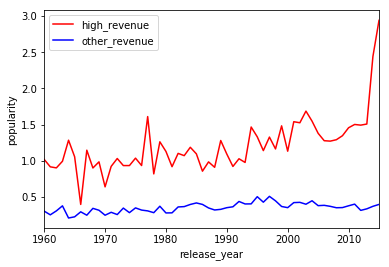

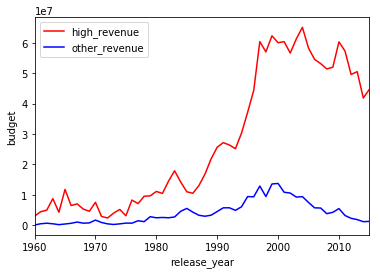

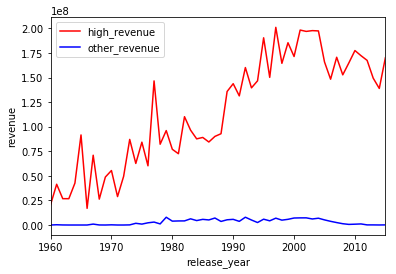

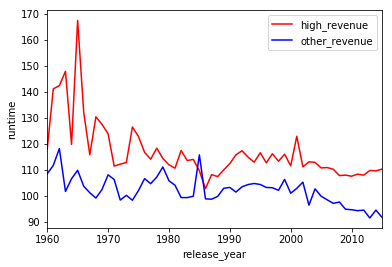

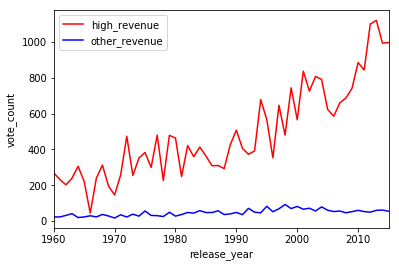

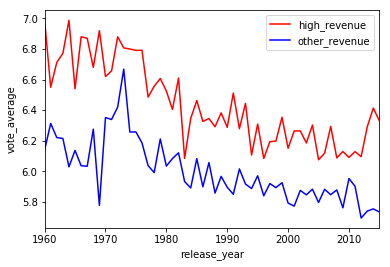

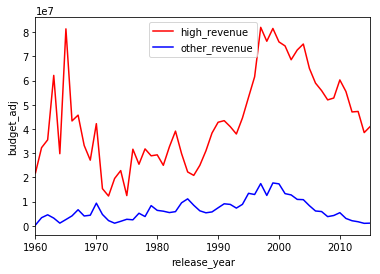

In [108]:
new_df = df
# 获取每年的Q3的值并追加到dataframe
new_df['revenue_Q3'] = new_df.groupby(['release_year'])['revenue'].transform(lambda x: np.percentile(x, q=75))
# 票房高的电影
high_revenue = new_df[df['revenue'] > df['revenue_Q3']]
# 其他电影
other_revenue = new_df[df['revenue'] <= df['revenue_Q3']]
# 获取两种电影各个属性的平均值
high_revenue.groupby(['release_year']).mean()
other_revenue.groupby(['release_year']).mean()
# 截取有用的属性
high_revenue_mean = high_revenue.groupby(['release_year']).mean().iloc[:,1:8]
other_revenue_mean = other_revenue.groupby(['release_year']).mean().iloc[:,1:8]
# 绘图
for col in high_revenue_mean:
    ax = high_revenue_mean[col].plot(color='red')
    ax.set_ylabel(col)
    ax1 = other_revenue_mean[col].plot(color='blue')
    ax1.legend(['high_revenue','other_revenue'])
    plt.show()

<a id='conclusions'></a>
## 结论

### 每年最受欢迎的电影类别是哪些?
结论：最受欢迎的电影类别分别有："Adventure","Animation","Fantasy"等  
### 票房高的电影有哪些特点？
结论：票房高的电影相对应的"budget","runtime","vote"都高于票房低的电影

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])